# Using some of this as reference for the current subway data project

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



In [7]:
filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

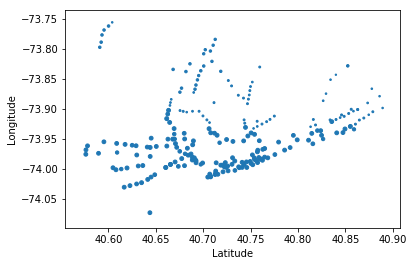

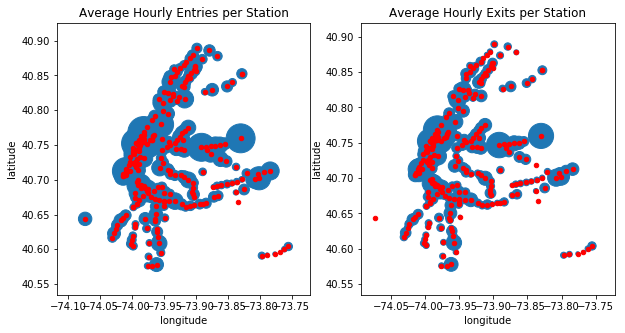

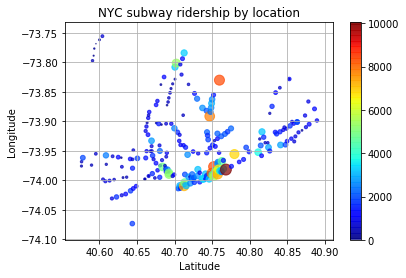

In [8]:

data_by_location = subway_df.groupby(['latitude', 'longitude'], as_index=False).mean()
scaled_by_precipi = data_by_location['precipi'] / data_by_location['precipi'].std() * 5
plt.scatter(data_by_location['latitude'], data_by_location['longitude'], s=scaled_by_precipi)
plt.xlabel('Latitude')
plt.ylabel('Longitude')

unit_data = subway_df.groupby('UNIT').mean()

fig, axes = plt.subplots(1,2, figsize = (10, 5))
unit_data.plot(kind='scatter', x='longitude', y='latitude', s = unit_data['ENTRIESn_hourly']/10.0, ax = axes[0])
unit_data.plot(kind='scatter', x='longitude', y='latitude', color = 'red', ax=axes[0])
axes[0].set_title('Average Hourly Entries per Station')
unit_data.plot(kind='scatter', x='longitude', y='latitude', s = unit_data['EXITSn_hourly']/10.0, ax = axes[1])
unit_data.plot(kind='scatter', x='longitude', y='latitude', color = 'red', ax=axes[1])
axes[1].set_title('Average Hourly Exits per Station')

grouped_data = subway_df.groupby(['latitude', 'longitude'], as_index=False).mean()
x = grouped_data['latitude']
y = grouped_data['longitude']
area = grouped_data['ENTRIESn_hourly']/grouped_data['ENTRIESn_hourly'].std(ddof=0)
cm= plt.cm.get_cmap('jet')
fig, ax = plt.subplots()
sc = plt.scatter(x, y, s=area*20, c=grouped_data['ENTRIESn_hourly'], cmap=cm, alpha=0.7)
plt.title('NYC subway ridership by location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
ax.grid(True)
fig.colorbar(sc)

In [3]:
a = subway2_df['TIME'][0]

NameError: name 'subway2_df' is not defined

In [4]:
b = subway2_df['DATE'][0]

NameError: name 'subway2_df' is not defined

In [68]:
a,b

('00:00:00', '03/31/2018')

In [73]:
c = b+a

In [74]:
c

'03/31/201800:00:00'

In [71]:
from datetime import datetime

In [76]:
d = datetime.strptime(c, '%m/%d/%Y%H:%M:%S')

2018-03-31 00:00:00


In [57]:
#converts DATE to datetime object subway2_df['DATE'] = pd.to_datetime(subway2_df['DATE'])

I saved a piece of the subway data as a file subway_data.txt. This is a CSV in everything but name, so I used the pd.read_csv to parse it and create the dataframe. I then used the lambda expression to combine the info in DATE and TIME columns to then convert them to datetime usinmg built in pd functions.

I created the to_hourly functionm to determine the number of folks passing through turnstiles hourly. It currently has a hiccup of it just parses top to bottom and does not understand the need to adjust for changing turnstiles (since numbers vary greatly). I think we could run some groupby information through the function and have it do what we need it to do. But I am going to save that for tomorrow.

In [ ]:
filename = 'subway_data.txt'
subway2_df = pd.read_csv(filename)

In [125]:
subway2_df['datetime'] = subway2_df[['DATE','TIME']].apply(lambda x: ' '.join(x), axis=1)
subway2_df['datetime'] = pd.to_datetime(subway2_df['datetime'])

In [127]:
def get_hourly(entries_or_exits):
    return entries_or_exits - entries_or_exits.shift(1)

In [128]:
subway2_df['Hourly_Entries'] = get_hourly(subway2_df['ENTRIES'])

In [131]:
subway2_df['Hourly_Exits'] = get_hourly(subway2_df['EXITS'])

In [152]:
subway2_df[['Hourly_Entries', 'Hourly_Exits']].sample(100) #this is what clued me in to the error in how the function was parsing ridership.

,Hourly_Entries,Hourly_Exits
30098,112.0,74.0
21847,76.0,146.0
52187,126.0,120.0
91466,1.0,6.0
70131,0.0,0.0
100228,93.0,22.0
2522,593.0,208.0
134556,0.0,0.0
147229,271.0,29.0
74240,27.0,140.0


Timestamp('2018-03-31 00:00:00')

In [143]:
subway2_df.groupby(['STATION']).

In [129]:
subway2_df.columns = subway2_df.columns.str.strip()

In [132]:
subway2_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime,Hourly_Entries,Hourly_Exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2224050,2018-03-31 00:00:00,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2224053,2018-03-31 04:00:00,7.0,3.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2224053,2018-03-31 08:00:00,0.0,0.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2224055,2018-03-31 12:00:00,0.0,2.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2224055,2018-03-31 16:00:00,0.0,0.0
